In [1]:
#IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

#IMPORTING CLASSES

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#LOADING THE DATASET

df = pd.read_csv(r"C:\Users\Ritika Kumari\Downloads\archive (49).zip")
print("SHAPE : " , df.shape)

SHAPE :  (418, 12)


In [3]:
#CHECKING THE DATATYPE 

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#DISPLAYING THE TOP HEAD VALUES

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
#GETTING THE DISCRIPTION OF THE DATAFRAME

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#GETTING THE INFO. OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#GETTING THE NAME OF ALL THE COLUMNS

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# CHECKING THE NULL VALUES


In [8]:
#CHECKING THE NULL VALUES IN ALL THE COLUMNS

miss_per = (df.isnull().sum()/418)*100
miss_per

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [9]:
#DROPPING THE CABIN COLUMN AS THE PERCENTAGE OF MISSING VALUE IS VERY CLOSE TO 80%

new_df = df.drop(columns='Cabin')
new_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


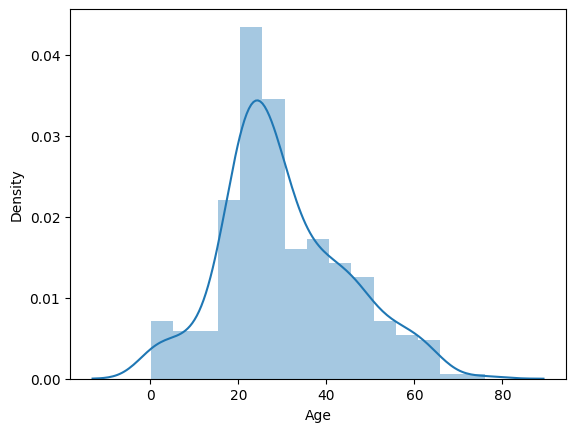

In [10]:
sns.distplot(new_df['Age'])
plt.show()

OBSERVATION:
    SINCE THE DISTRIBUTION IS SKEWED THEREFORE WE WILL FILL THE MISSING VALUE WITH THE MEDIAN VALUE

In [11]:
#FILLING THE MISSING VALUE

df_med_val = new_df.fillna(new_df.median())
df_med_val.isnull().sum().sum()

C:\Users\Ritika Kumari\AppData\Local\Temp\ipykernel_8996\3912872108.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_med_val = new_df.fillna(new_df.median())


0

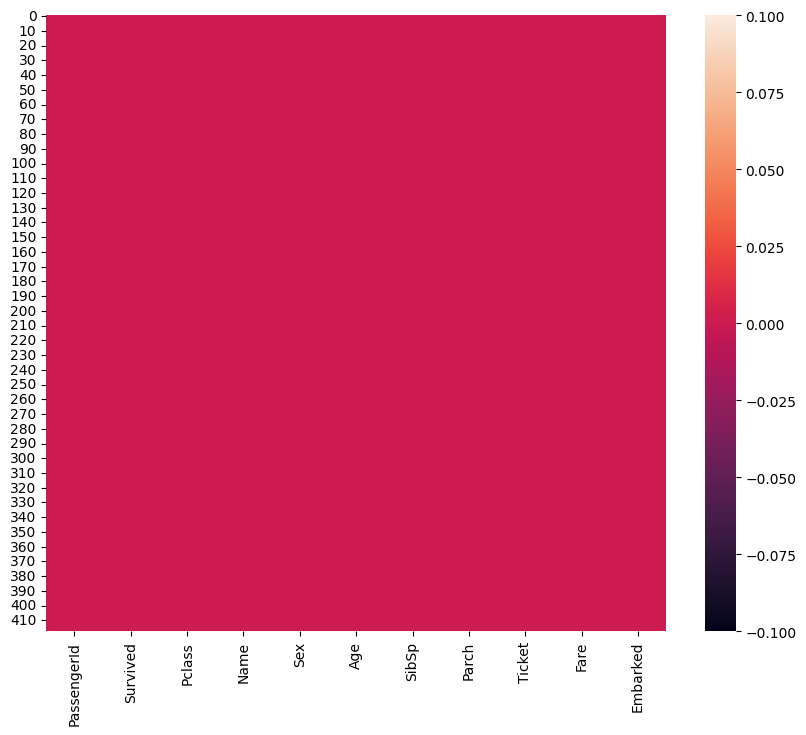

In [12]:
#VISUALISING THE DATAFRAME
#USING HEATMAP

plt.figure(figsize=(10,8))
sns.heatmap(df_med_val.isnull())
plt.show()

THE MISSING VALUES HAVE BEEN FILLED SUCCESSFULLY!!

# HANDLING OUTLIERS

In [13]:
#GETTING ALL THE NUMERICAL FEATURES

num_var = df_med_val.select_dtypes(include=['int64','float64']).keys()
num_var

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<Figure size 1600x1000 with 0 Axes>

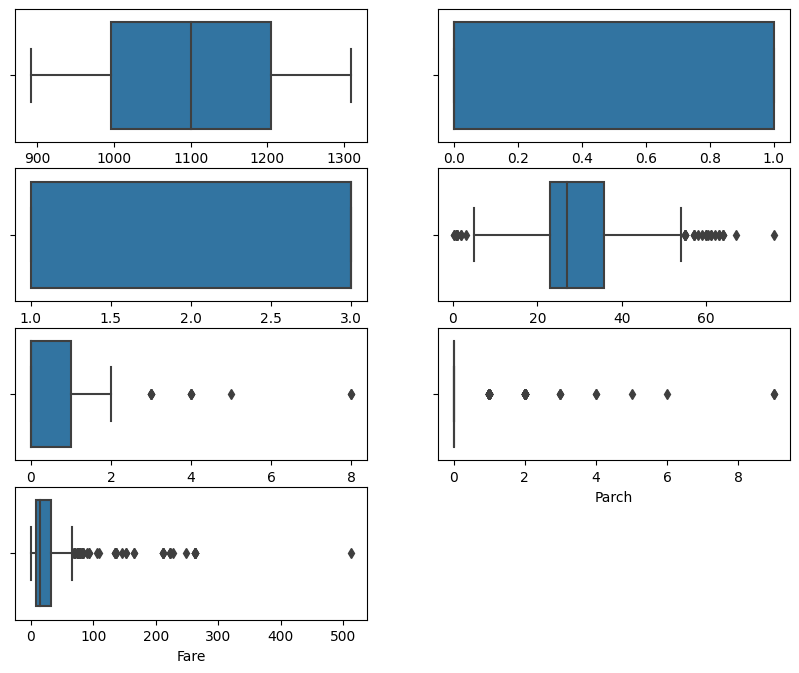

In [14]:
#PLOTTING BOXPLOT TO CHECK VISUALISE OUTLIERS(IF ANY) IN THE DATAFRAME
plt.figure(figsize=(16,10))
num_var = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(10,10))
for i , var in enumerate(num_var):
    plt.subplot(5,2,i+1)
    sns.boxplot(df_med_val[var])
    
plt.show()

In [15]:
#LISTING THE NUMERICAL FEATURES

num_var =  ['Age', 'SibSp', 'Parch', 'Fare']

#SORTING THE DATAFRAME

df_med_val['Age'] = sorted(df_med_val['Age'])
df_med_val['SibSp'] = sorted(df_med_val['SibSp'])
df_med_val['Parch'] = sorted(df_med_val['Parch'])
df_med_val['Fare'] = sorted(df_med_val['Fare'])


In [16]:
#CALCULATING 1ST , 3RD QUANTILE AND INTERQUANTILE RANGE AND

out_lier = ['Age', 'SibSp', 'Parch', 'Fare']

for i, var in enumerate(out_lier):
    q1 = df_med_val[var].quantile(0.25)
    q3 = df_med_val[var].quantile(0.75)
    iqr = q3 - q1
   
    print("--------------------------------------------------")
    print("25th percentile(q1) value of feature ", var,":" ,q1 )
    print("75th percentile(q3) value of feature ", var,":" ,q3 )
    print("IQR of feature ", var,":" ,iqr )
    print("--------------------------------------------------") 

--------------------------------------------------
25th percentile(q1) value of feature  Age : 23.0
75th percentile(q3) value of feature  Age : 35.75
IQR of feature  Age : 12.75
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  SibSp : 0.0
75th percentile(q3) value of feature  SibSp : 1.0
IQR of feature  SibSp : 1.0
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  Parch : 0.0
75th percentile(q3) value of feature  Parch : 0.0
IQR of feature  Parch : 0.0
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  Fare : 7.8958
75th percentile(q3) value of feature  Fare : 31.471875
IQR of feature  Fare : 23.576075
--------------------------------------------------


In [17]:
#CALCULATING UPPER AND LOWER LIMITS 

out_lier =  ['Age', 'SibSp', 'Parch', 'Fare']

def limits(feature,q1,q3,iqr):
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    print("upper limit ( ", feature, " )" , " : ", upper_limit)
    print("lower limit ( ", feature, " )" , " : ", lower_limit)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    

limits("Age",  23.0,35.75, 12.75)
limits("SibSp", 0.0, 1.0,1.0)
limits("Parch",  0.0,0.0,0.0)
limits("Fare", 7.8958 ,31.471875 , 23.576075)


upper limit (  Age  )  :  54.875
lower limit (  Age  )  :  3.875
--------------------------------------------------------
--------------------------------------------------------
upper limit (  SibSp  )  :  2.5
lower limit (  SibSp  )  :  -1.5
--------------------------------------------------------
--------------------------------------------------------
upper limit (  Parch  )  :  0.0
lower limit (  Parch  )  :  0.0
--------------------------------------------------------
--------------------------------------------------------
upper limit (  Fare  )  :  66.8359875
lower limit (  Fare  )  :  -27.468312499999996
--------------------------------------------------------
--------------------------------------------------------


# CAPPING

In [18]:
#CAPPING - changing the outliers to upper and lower limits

out_lier = ['Age', 'SibSp', 'Parch', 'Fare']
df_cap = df_med_val.copy()

def cap_out_lier(var,upper_limit,lower_limit):
    df_cap[var]=np.where(
    df_cap[var]>upper_limit,
    upper_limit,
    np.where(
    df_cap[var]<lower_limit,
    lower_limit,
    df_cap[var]))
    


    
cap_out_lier("Age", 54.875,3.875)
cap_out_lier("SibSp", 2.5, -1.5)
cap_out_lier("Parch", 0.0,0.0)
cap_out_lier("Fare", 66.8359875, -27.468312499999996)

C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ritika Kumari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<Figure size 400x500 with 0 Axes>

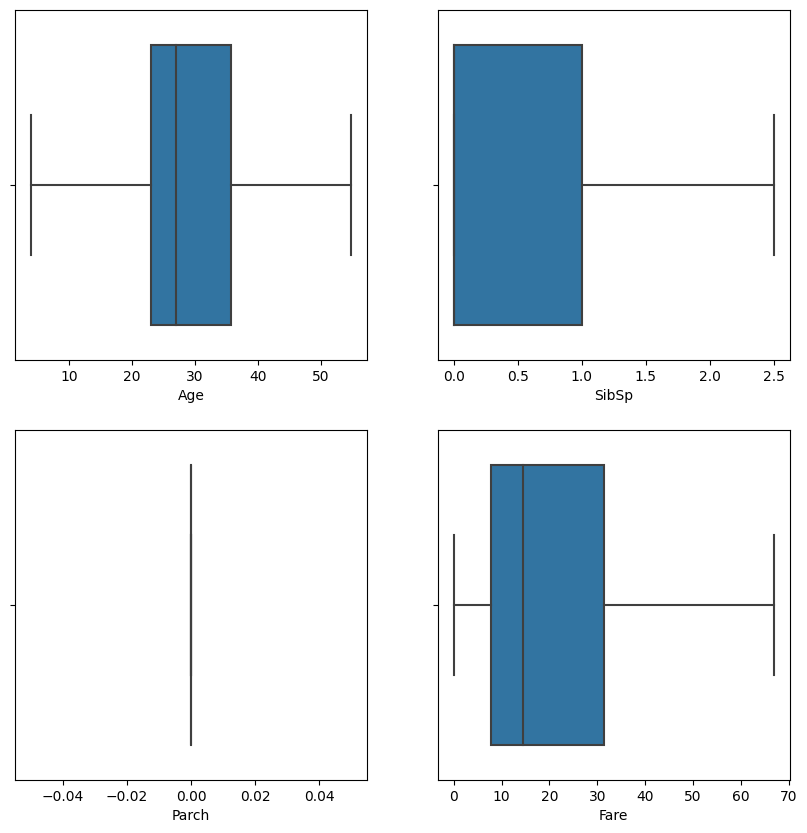

In [19]:
#PLOTTING BOXPLOT TO CHECK VISUALISE OUTLIERS(IF ANY) IN THE DATAFRAME
plt.figure(figsize=(4,5))
out_lier = ['Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(10,10))
for i , var in enumerate(out_lier):
    plt.subplot(2,2,i+1)
    sns.boxplot(df_cap [var])
    
plt.show()

ALL THE OUTLIERS ARE HANDLED EFFECTIVELY!!

# EXPLORATORY DATA ANALYSIS

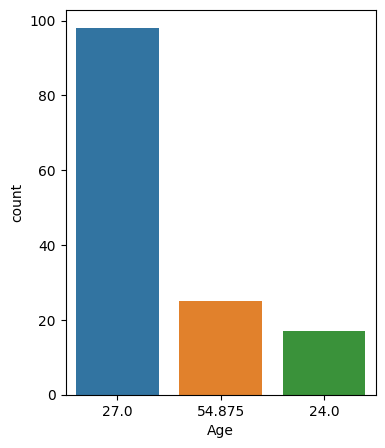

In [20]:
#CHECKING THE WEIGHTAGE OF PEOPLE FROM DIFFERNT AGE GROUP
#USING COUNTPLOT


plt.figure(figsize = (4,5))
sns.countplot(x = 'Age' , data = df_cap ,order=df_cap.Age.value_counts().iloc[:3].index)
plt.show()

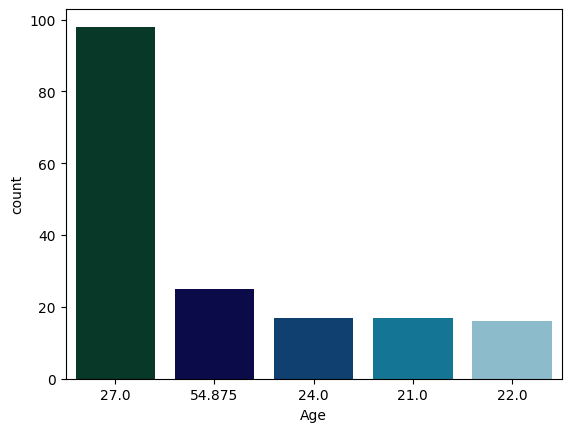

In [21]:
sns.countplot(x = 'Age' , data = df_cap, palette="ocean",
              order=df_cap.Age.value_counts().iloc[:5].index)
plt.show()

In [22]:
df_cap.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

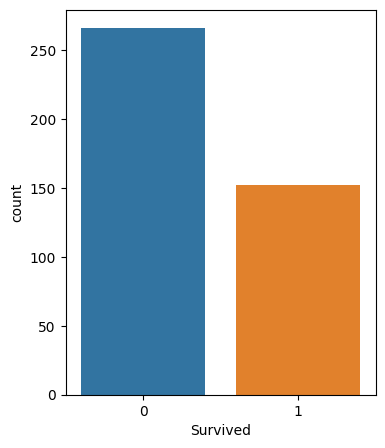

In [23]:
plt.figure(figsize =(4,5))
sns.countplot(x = 'Survived' , data = df_cap )
plt.show()


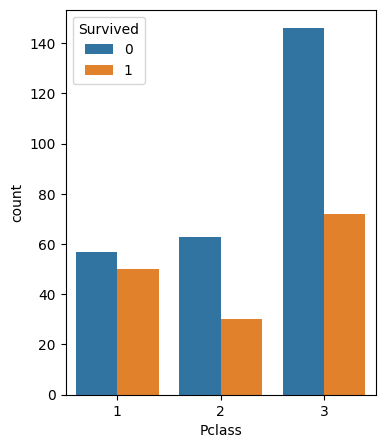

In [24]:
plt.figure(figsize =(4,5))
sns.countplot(x = 'Pclass',hue='Survived' , data = df_cap )
plt.show()

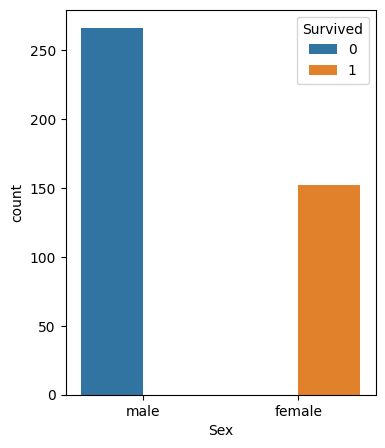

In [25]:
plt.figure(figsize =(4,5))
sns.countplot(x = 'Sex',hue='Survived' , data = df_cap )
plt.show()

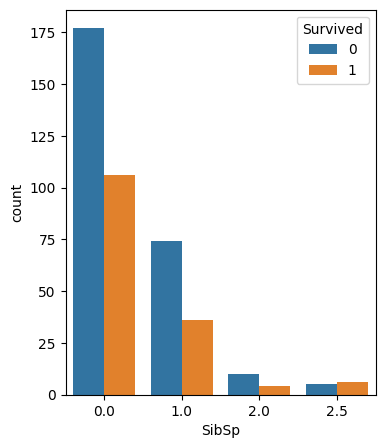

In [26]:
plt.figure(figsize =(4,5))
sns.countplot(x = 'SibSp',hue='Survived'  , data = df_cap )
plt.show()

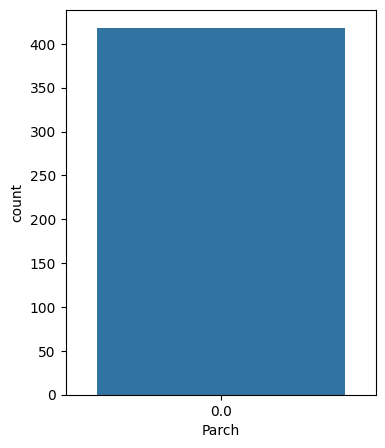

In [27]:
plt.figure(figsize =(4,5))
sns.countplot(x='Parch',data=df_cap)
plt.show()
